## Outgroup f3
1. Comparing to worldwide populations

In [43]:
%%writefile /mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/calcoutf3.py

import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
from multiprocessing import Pool

low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9","XiahaishiM22",
     "Hupo14","Hupo-a","Shangluzhuang0","Sanheyi11", 
     "Wuba","HuoshaogouM117",
     "Jinchankou0","Wenpuju03","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2",
     "Hupo8","Lajigai2","Lajigai-a","Qunke1","Lierbao0","Hedong4"]
high=["PukagongmaM1","PukagongmaM2","PukagongmaM3","PukagongmaM5",
     "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
others=["Tianyuan","Kostenki14","Vestonice16","Loschbour","ElMiron","Stuttgart",
        "UstIshim","Yana_old","Yana_old2","Kolyma_River","IK002_Jomon",
        "La368_G1","Oakaie1","Malta1","Anatolia_N",
        "Gonur2_BA","Shahr_I_Sokhta_BA2","Shahr_I_Sokhta_BA3","Onge","Papuan",
        "Mixe","Karitiana","Natufian","Cambodian","Burmese","Thai",
       "Karelia","Yamnaya","West_Siberia_N","Afanasievo","Sintashta_MLBA",
       "Loebanr_IA","Udegram_IA","Barikot_IA","Katelai_IA","Aligrama_IA","Arkotkila_IA",
       "Saidu_Sharif_IA","Saidu_Sharif_IA_o","Butkara_IA"]
allind=low+high+eas+tib+others

def dof3work(allids,name,tv=""):
    pD="/mnt/solexa/mel_yang/data/2.2M/"
    outpD="/mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/"
    fh = 'UPA16'
    if tv=="tv": subset = 'transv.T_Mbuti_S1_%s_S2_%s' % (name,name)
    else: subset = 'T_Mbuti_S1_%s_S2_%s' % (name,name)
    
    AB = [(i,j) for i in allids for j in allids if i != j ]
    Xs = ["Mbuti"]
    
    pm.f3popfile(AB, Xs, pD+fh, subset)
    if tv=="tv": pm.f3parfile(pD,fh,subset,popfh=fh,badsnp="%s.transi.snp" % fh)
    else: pm.f3parfile(pD,fh,subset,popfh=fh)
    outfile = open(outpD+fh+'.f3.'+subset+".log",'w')
    mycommand1='mv '+pD+fh+'.f3.'+subset+'.par '+outpD+fh+'.f3.'+subset+'.par'
    varfile = Popen(mycommand1.split())
    varfile.communicate()
    mycommand = 'qp3Pop -p '+outpD+fh+'.f3.'+subset+'.par'
    print 'Running command', mycommand

    varfile = Popen(mycommand.split(), stdout = outfile)
    varfile.communicate()
    outfile.close()
#dof3work(allind,'aTib+More')
dof3work(allind,'aTib+More',tv="tv")


Overwriting /mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/calcoutf3.py


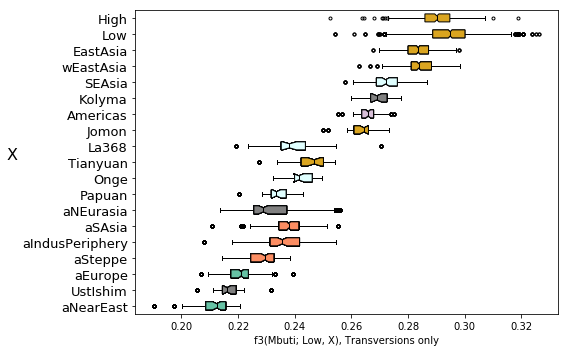

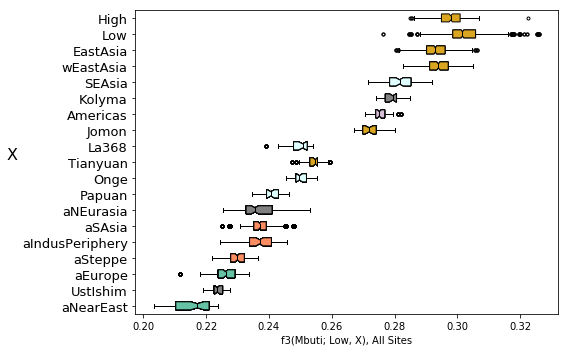

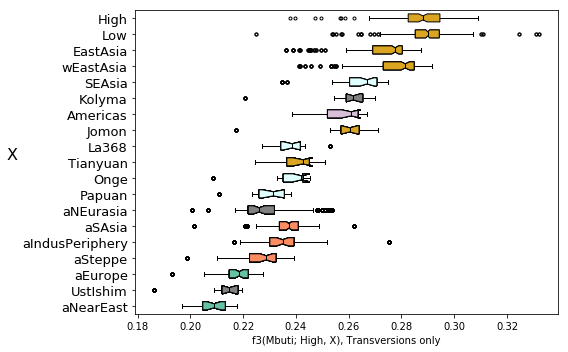

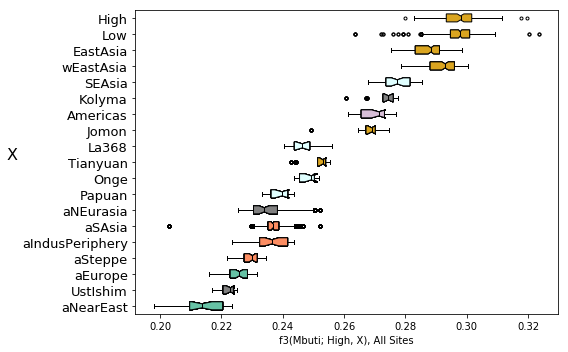

In [6]:
from plateaumodules import piid1, parseoutf3

import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches

low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9","XiahaishiM22",
     "Hupo14","Hupo-a","Shangluzhuang0","Sanheyi11", 
     "Wuba","HuoshaogouM117",
     "Jinchankou0","Wenpuju03","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2",
     "Hupo8","Lajigai2","Lajigai-a","Qunke1","Lierbao0","Hedong4"]
high=["PukagongmaM1","PukagongmaM2","PukagongmaM3","PukagongmaM5",
     "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
others=["Tianyuan","Kostenki14","Vestonice16","Loschbour","ElMiron","Stuttgart",
        "UstIshim","Yana_old","Yana_old2","Kolyma_River","IK002_Jomon",
        "La368_G1","Oakaie1","Malta1","Anatolia_N",
        "Gonur2_BA","Shahr_I_Sokhta_BA2","Shahr_I_Sokhta_BA3","Onge","Papuan",
        "Mixe","Karitiana","Natufian","Cambodian","Burmese","Thai",
       "Karelia","Yamnaya","West_Siberia_N","Afanasievo","Sintashta_MLBA",
       "Loebanr_IA","Udegram_IA","Barikot_IA","Katelai_IA","Aligrama_IA","Arkotkila_IA",
       "Saidu_Sharif_IA","Saidu_Sharif_IA_o","Butkara_IA"]
allind=low+high+eas+tib+others
fh="UPA16"
categories=[('T_Mbuti_S1_aTib+More_S2_aTib+More','.transv',"Transversions only",low,"Low"),
            ('T_Mbuti_S1_aTib+More_S2_aTib+More','',"All Sites",low,"Low"),
            ('T_Mbuti_S1_aTib+More_S2_aTib+More','.transv',"Transversions only",high,"High"),
            ('T_Mbuti_S1_aTib+More_S2_aTib+More','',"All Sites",high,"High")]

myregions=['High','Low','EastAsia','wEastAsia','SEAsia',
           'Kolyma','Americas','Jomon','La368','Tianyuan',
           'Onge','Papuan','aNEurasia',
           'aSAsia','aIndusPeriphery','aSteppe',
           'aEurope',"UstIshim",'aNearEast']
mycolors=["goldenrod","goldenrod","goldenrod","goldenrod","lightcyan",
         "gray","thistle","goldenrod","lightcyan","goldenrod",
         "lightcyan","lightcyan","gray",
         (0.9882352941176471, 0.55294117647058827, 0.3843137254901961),(0.9882352941176471, 0.55294117647058827, 0.3843137254901961),(0.9882352941176471, 0.55294117647058827, 0.3843137254901961),
         (0.40000000000000002, 0.76078431372549016, 0.6470588235294118),"gray",
         (0.40000000000000002, 0.76078431372549016, 0.6470588235294118)][::-1]
pd="/mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")
mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)

for popname,tv,tv1,myinds,myindname in categories:
    out="Mbuti"
    myf3dat=parseoutf3(pd+"%s.f3%s.%s.log" % (fh,tv,popname))
    myys={}
    for ind,i in enumerate(myinds):
        if i not in myys: myys[i]={}
        for popn in mysets.keys(): 
            myys[i][popn]=[]
            for smallpop in mysets[popn]: 
                if i==smallpop: continue
                if smallpop=="Mbuti": continue
                if smallpop in ["Uygur","Mixtec","Tu"]: continue
                if smallpop in ["MOS1","MOS2","MOS3","MOS4","MOS5","MOS6"]: continue
                if smallpop in ["Stuttgart","Karelia"]: continue
                #if smallpop in ["Karelia","Arkotkila_IA","Anatolia_N"]: continue
                try:
                    myys[i][popn].append(myf3dat[i][(i,smallpop,out)][0])
                except KeyError:
                    myys[i][popn].append(myf3dat[smallpop][(smallpop,i,out)][0])

    fig = plt.figure(figsize=(8,5))
    ax1=fig.add_subplot(1,1,1)
    myregions1 = myregions[::-1]
    flierprops = dict(marker='.')
    medianprops = dict(color='black')
    meanpointprops = dict(marker='D', markeredgecolor='black',
                          markerfacecolor='firebrick')

    biglst=[]
    for region in myregions1:
        mylst=[]
        for i in myys: mylst+=myys[i][region]
        biglst.append(mylst)

        box=ax1.boxplot(biglst,vert=False,notch=True,patch_artist=True, 
                        flierprops=flierprops, medianprops=medianprops)

    ax1.set_yticklabels(myregions1,fontsize=13)
    ax1.set_xlabel("f3(Mbuti; %s, X), %s" % (myindname,tv1))
    ax1.set_ylabel("X  ",rotation=360,fontsize=16)

    #mycolors=[(0.70196078431372544, 0.70196078431372544, 0.70196078431372544),
    #          (1.0, 0.85098039215686272, 0.18431372549019609),         
    #          (0.9882352941176471, 0.55294117647058827, 0.3843137254901961), 
    #          (0.40000000000000002, 0.76078431372549016, 0.6470588235294118), 
    #          (0.55294117647058827, 0.62745098039215685, 0.79607843137254897), 
    #          (0.90588235294117647, 0.54117647058823526, 0.76470588235294112), 
    #          (0.89803921568627454, 0.7686274509803922, 0.58039215686274515),
    #         (0.65098039215686276, 0.84705882352941175, 0.32941176470588235), 
    #         "gray","thistle","lightcyan","goldenrod","gray","thistle","lightcyan","goldenrod"][::-1]
    for patch, color in zip(box['boxes'], mycolors):
        patch.set_facecolor(color)
        patch.set_edgecolor("black")
    plt.tight_layout()
    plt.show()

In [34]:
print myinds

['Zongri-a', 'Zongri-b', 'Zongri-c', 'ZongriM32', 'ZongriM40', 'ZongriM78', 'Daxiang0', 'Hedong6', 'Hejiatai', 'LiuwanQH-1', 'XiahaishiM9', 'XiahaishiM22', 'Hupo14', 'Hupo-a', 'Shangluzhuang0', 'Sanheyi11', 'Wuba', 'HuoshaogouM117', 'Jinchankou0', 'Wenpuju03', 'QijiapingM108-2', 'QijiapingM89-2', 'QijiapingM104-2', 'Hupo8', 'Lajigai2', 'Lajigai-a', 'Qunke1', 'Lierbao0', 'Hedong4']


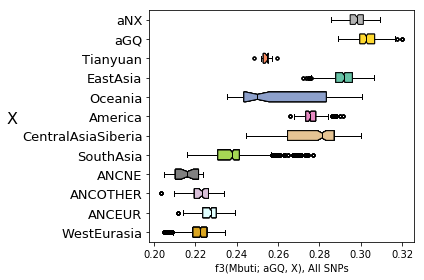

In [1]:
from plateaumodules import piid1, parseoutf3

import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches

low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9","XiahaishiM22",
     "Hupo14","Hupo-a","Shangluzhuang0","Sanheyi11", 
     "Wuba","HuoshaogouM117",
     "Jinchankou0","Wenpuju03","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2",
     "Hupo8","Lajigai2","Lajigai-a","Qunke1","Lierbao0","Hedong4"]
high=["PukagongmaM1","PukagongmaM2","PukagongmaM3","PukagongmaM5",
     "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
others=["Tianyuan","Kostenki14","Vestonice16","Loschbour","ElMiron","Stuttgart",
        "UstIshim","Yana_old","Yana_old2","Kolyma_River","Oakaie1","Malta1","Anatolia_EN",
        "Gonur2_BA","Shahr_I_Sokhta_BA2","Shahr_I_Sokhta_BA3","Onge","Papuan",
        "Mixe","Karitiana","Natufian","Cambodian","Burmese","Thai",
       "Karelia_HG","Yamnaya","West_Siberia_N","Afanasievo","Sintashta_MLBA",
       "Loebanr_IA","Udegram_IA","Barikot_IA","Katelai_IA","Aligrama_IA","Arkotlika_IA",
       "Saidu_Sharif_IA","Saidu_Sharif_IA_o","Butkara_IA"]
allind=low+high+eas+tib+others

popname,tv,tv1,myinds=('X_Mbuti_S1_aTib+More_S2_aTib+More','.transv',"Transversions only",agq)
popname,tv,tv1,myinds=('X_Mbuti_S1_aTib+More_S2_aTib+More','',"All Sites",agq)


pd="/mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")

mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
myf3dat=parseoutf3(pd+"%s.f3%s.%s.log" % (fh,tv,popname))

#myregions = ['aNX','aGQ','EastAsia','Oceania','SouthAsia','CentralAsiaSiberia','ANCEAS',
#             'America','ANCAMER','ANCNE','ANCOTHER','ANCEUR','WestEurasia'][::-1] ##,'Africa'
myregions = ['Low','aGQ','Tianyuan','EastAsia','Oceania','America','CentralAsiaSiberia','SouthAsia'][::-1] ##,'Africa','ANCNE','ANCOTHER','ANCEUR','WestEurasia','ANCAMER'

out="Mbuti"
myys={}
for ind,i in enumerate(myinds):
    if i not in myys: myys[i]={}
    for popn in mysets.keys(): 
        myys[i][popn]=[]
        for smallpop in mysets[popn]: 
            if i==smallpop: continue
            if smallpop=="Mbuti": continue
            if smallpop in ["Uygur","Mixtec","Tu"]: continue
            if smallpop in ["MOS1","MOS2","MOS3","MOS4","MOS5","MOS6"]: continue
            try:
                myys[i][popn].append(myf3dat[i][(i,smallpop,out)][0])
            except KeyError:
                myys[i][popn].append(myf3dat[smallpop][(smallpop,i,out)][0])
                
fig = plt.figure() #figsize=(10,5))
ax1=fig.add_subplot(1,1,1)
myregions = ['aNX','aGQ','Tianyuan','EastAsia','Oceania','America','CentralAsiaSiberia','SouthAsia',
             'ANCNE','ANCOTHER','ANCEUR','WestEurasia'][::-1]
flierprops = dict(marker='.')
medianprops = dict(color='black')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')

biglst=[]
for region in myregions:
    mylst=[]
    for i in myys: mylst+=myys[i][region]
    biglst.append(mylst)

    box=ax1.boxplot(biglst,vert=False,notch=True,patch_artist=True, 
                    flierprops=flierprops, medianprops=medianprops)

ax1.set_yticklabels(myregions,fontsize=13)
ax1.set_xlabel("f3(Mbuti; %s, X), %s" % (popname,tv1))
ax1.set_ylabel("X  ",rotation=360,fontsize=16)
mycolors=[(0.70196078431372544, 0.70196078431372544, 0.70196078431372544),
          (1.0, 0.85098039215686272, 0.18431372549019609),         
          (0.9882352941176471, 0.55294117647058827, 0.3843137254901961), 
          (0.40000000000000002, 0.76078431372549016, 0.6470588235294118), 
          (0.55294117647058827, 0.62745098039215685, 0.79607843137254897), 
          (0.90588235294117647, 0.54117647058823526, 0.76470588235294112), 
          (0.89803921568627454, 0.7686274509803922, 0.58039215686274515),
         (0.65098039215686276, 0.84705882352941175, 0.32941176470588235), 
         "gray","thistle","lightcyan","goldenrod"][::-1]
for patch, color in zip(box['boxes'], mycolors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
plt.tight_layout()
plt.show()

In [13]:
pd="/mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=open(pd+"allpops_merged.txt")
for line in mypops:
    print line.strip()

Zongri-a	Low
Zongri-b	Low
Zongri-c	Low
ZongriM32	Low
ZongriM40	Low
ZongriM78	Low
Daxiang0	Low
Hedong6	Low
Hejiatai	Low
LiuwanQH-1	Low
XiahaishiM9	Low
XiahaishiM22	Low
Hupo14	Low
Hupo-a	Low
Shangluzhuang0	Low
Sanheyi11	Low
Wuba	Low
HuoshaogouM117	Low
Jinchankou0	Low
Wenpuju03	Low
QijiapingM108-2	Low
QijiapingM89-2	Low
QijiapingM104-2	Low
Hupo8	Low
Lajigai2	Low
Lajigai-a	Low
Qunke1	Low
Lierbao0	Low
Hedong4	Low
PukagongmaM1	High
PukagongmaM2	High
PukagongmaM3	High
PukagongmaM5	High
Butaxiongqu	High
RedilongM3	High
XiaoendaM1	High
XiaoendaM2	High
Chokhopani	High
Mebrak	High
Samdzong	High
CaixiutangJ2-13	High
YushuSGZ-1	High
Oroqen	EastAsia
Hezhen	EastAsia
Daur	EastAsia
Xibo	EastAsia
Japanese	EastAsia
Korean	EastAsia
Han	EastAsia
She	EastAsia
Miao	EastAsia
Tujia	EastAsia
Dai	EastAsia
Kinh	EastAsia
Lahu	EastAsia
Ami	EastAsia
Atayal	EastAsia
Naxi	wEastAsia
Yi	wEastAsia
Tu	wEastAsia
Tibetan	wEastAsia
Sherpa	wEastAsia
Tibetan_ChamdoX	wEastAsia
Tibetan_LhasaX	wEastAsia
Tibetan_NagquX	wEastAsia
T

In [ ]:
low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9","XiahaishiM22",
     "Hupo14","Hupo-a","Shangluzhuang0","Sanheyi11", 
     "Wuba","HuoshaogouM117",
     "Jinchankou0","Wenpuju03","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2",
     "Hupo8","Lajigai2","Lajigai-a","Qunke1","Lierbao0","Hedong4"]
high=["PukagongmaM1","PukagongmaM2","PukagongmaM3","PukagongmaM5",
     "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]

In [5]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
#import matplotlib
import matplotlib.patches as mpatches

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
#tv=""
fhall="aPlateau%s.dstat.log" % tv

low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9","XiahaishiM22",
     "Hupo14","Hupo-a","Shangluzhuang0","Sanheyi11", 
     "Wuba","HuoshaogouM117",
     "Jinchankou0","Wenpuju03","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2",
     "Hupo8","Lajigai2","Lajigai-a","Qunke1","Lierbao0","Hedong4"]
high=["PukagongmaM1","PukagongmaM2","PukagongmaM3","PukagongmaM5",
     "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]

aeur=["Loschbour"]
aeur2=["Satsurblia"]
natufian=["Natufian"]
ane=["Malta1"]
ancother=["UstIshim"]
othereas=["Tianyuan"] #,"Papuan","Onge","Oase1","Stuttgart",
moreasn=["Onge"]
varypops=[othereas,moreasn,ane,natufian,ancother, aeur,aeur2][::-1]
labels=["Tianyuan","Onge","Mal'ta1",'Natufian',"Ust'-Ishim","Loschbour",'Satsurblia'][::-1] #/Papuan/Onge/Oase1
dxcluster=low+high
dxpairs=[(i,j) for indi,i in enumerate(dxcluster) for indj,j in enumerate(["Han"])] # if indi>indj]
print dxpairs
pairlabels=["%s_%s" % mypair for mypair in dxpairs]
#print pairlabels
out="Chimp"
colors=["blue","brown","red","black","pink","gray","purple"][::-1]
markers=["o","v","s","+","D",">"]
print len(dxpairs)

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
handles1,handles2=[],[]
for ind,mypair in enumerate(dxpairs):
    if ind % 10==0: print ind,mypair
    #ax1.set_title("D(X1, aGQ; X2, Mbuti)")
    #ax1.set_ylim((-4,10))
    #ax1.set_xlim((-4,10))
    ax1.set_ylabel("Z for D(Low/High, X; Han, %s)" % out,fontsize=15)
    ax1.set_xlabel("Z for D(Han, X; Low/High, %s)" % out,fontsize=15)
    ax1.axvline(x=0, ls='dashed', c='black')
    ax1.axhline(y=0, ls='dashed', c='black')
    ax1.axvline(x=2, ls='dashed', c='lightgray')
    ax1.axhline(y=2, ls='dashed', c='lightgray')
    ax1.axvline(x=-2, ls='dashed', c='lightgray')
    ax1.axhline(y=-2, ls='dashed', c='lightgray')
    for ivp,varypop in enumerate(varypops):
        mypops1=[mypair[0],varypop,[mypair[1]],out]
        mypops2=[mypair[1],varypop,[mypair[0]],out]
        Zary1 = pm.mkDary(pD,fhall,mypops1,(0,3),(1,2),'Z')
        Zary2 = pm.mkDary(pD,fhall,mypops2,(0,3),(1,2),'Z')
        Zary=np.transpose(np.vstack((Zary1, Zary2)))[0,:]
        ax1.plot(Zary1,Zary2,'o',color=colors[ivp]) #markers[ind],
        #if ivp==0:
        #    handles1.append(mlines.Line2D([],[],marker=markers[ind],color='black',label=pairlabels[ind]))
        if ind==0:
            handles2.append(mpatches.Patch(color=colors[ivp], label=labels[ivp]))
        else: pass
#ax1.legend(loc='lower right')
#ax1.legend(handles=handles1+handles2,loc=4,ncol=2,fontsize=12.5)
ax1.legend(handles=handles2,loc=0)
plt.show()

#fig.savefig(pD+'agqclade.D%s.relEUR.png' % tv) # save the figure to file
#plt.close(fig)

[('Zongri-a', 'Han'), ('Zongri-b', 'Han'), ('Zongri-c', 'Han'), ('ZongriM32', 'Han'), ('ZongriM40', 'Han'), ('ZongriM78', 'Han'), ('Daxiang0', 'Han'), ('Hedong6', 'Han'), ('Hejiatai', 'Han'), ('LiuwanQH-1', 'Han'), ('XiahaishiM9', 'Han'), ('XiahaishiM22', 'Han'), ('Hupo14', 'Han'), ('Hupo-a', 'Han'), ('Shangluzhuang0', 'Han'), ('Sanheyi11', 'Han'), ('Wuba', 'Han'), ('HuoshaogouM117', 'Han'), ('Jinchankou0', 'Han'), ('Wenpuju03', 'Han'), ('QijiapingM108-2', 'Han'), ('QijiapingM89-2', 'Han'), ('QijiapingM104-2', 'Han'), ('Hupo8', 'Han'), ('Lajigai2', 'Han'), ('Lajigai-a', 'Han'), ('Qunke1', 'Han'), ('Lierbao0', 'Han'), ('Hedong4', 'Han'), ('PukagongmaM1', 'Han'), ('PukagongmaM2', 'Han'), ('PukagongmaM3', 'Han'), ('PukagongmaM5', 'Han'), ('Butaxiongqu', 'Han'), ('RedilongM3', 'Han'), ('XiaoendaM1', 'Han'), ('XiaoendaM2', 'Han'), ('Chokhopani', 'Han'), ('Mebrak', 'Han'), ('SamdzongCaixiutangJ2-13', 'Han'), ('YushuSGZ-1', 'Han')]
41
0 ('Zongri-a', 'Han')
10 ('XiahaishiM9', 'Han')


KeyboardInterrupt: 

In [ ]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
#import matplotlib
import matplotlib.patches as mpatches

agq=["Zongri-a","ZongriM32","Zongri-c","ZongriM78","Zongri-b","ZongriM40","Hedong4",#"XiahaishiM22",
     "Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11","Hupo-a","Hupo14",
     "Shangluzhuang0","Hupo8","Qunke1","Lajigai-a","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2","Wuba","HuoshaogouM117","Lierbao0"]
anx=["PukagongmaM1","PukagongmaM3","PukagongmaM5","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"]
weaklinks=["XiahaishiM22","Lajigai2","PukagongmaM2"]
#eas=["Han","Dai","Ami","Daur","Sherpa","Tibetan","Naxi","Yi"]
aeur=["Loschbour"]
ane=["Malta1"]
namer=["Clovis"]
casia=["Anatolia_N","Iran_N","Andronovo.SG","Afanasievo.SG"]
sasia=["Punjabi","Mala"]
ancother=["Onge"]
anceas=["Tianyuan"] #,"Papuan","Onge","Oase1","Stuttgart",
varypops=[anceas, ancother,namer,sasia,casia,ane,aeur][::-1]
labels=["Tianyuan","Onge","Anzick-1",'ANI/ASI',"NearEast/Steppe","Mal'ta1","Loschbour"][::-1] #/Papuan/Onge/Oase1
dxcluster=agq+anx#+weaklinks
dxpairs=[(i,j) for indi,i in enumerate(dxcluster) for indj,j in enumerate(dxcluster) if indi>indj]
pairlabels=["%s_%s" % mypair for mypair in dxpairs]
#print pairlabels
out="Mbuti"
colors=["blue","brown","red","black","pink","gray","purple"][::-1]
markers=["o","v","s","+","D",">"]

pDin="/mnt/solexa/mel_yang/aPlateau/update051518/"
pDout="/mnt/solexa/mel_yang/aPlateau/update051518/"
fh,tv=("complete2.dstat.log","")
#fh,tv=("complete.tv.dstat.log",".tv")

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
handles1,handles2=[],[]
for ind,varypop in enumerate(varypops):
    print varypop
    handles2.append(mpatches.Patch(color=colors[ind], label="X="+labels[ind]))
    for myind in varypop:
        mypops1=[dxcluster,myind,dxcluster,out]
        Zary = pm.mkDary(pDin,fh,mypops1,(1,3),(0,2),"Z") 
        #print Zary
        Zaryu=np.triu(Zary)
        Zaryl=np.transpose(np.tril(Zary))
        Zaryu[Zaryu==0]=np.nan
        Zaryl[Zaryl==0]=np.nan
        #print Zaryu,Zaryl
        ax1.plot(Zaryu,Zaryl,markers[0],color=colors[ind])
        

#ax1.set_ylim((-4,10))
#ax1.set_xlim((-4,10))
ax1.set_xlabel("Z for D(aTib, X; aTib, %s)" % out,fontsize=15)
ax1.set_ylabel("Z for D(aTib, X; aTib, %s)" % out,fontsize=15)
ax1.axvline(x=0, ls='dashed', c='black')
ax1.axhline(y=0, ls='dashed', c='black')
ax1.axvline(x=2, ls='dashed', c='lightgray')
ax1.axhline(y=2, ls='dashed', c='lightgray')
ax1.axvline(x=-2, ls='dashed', c='lightgray')
ax1.axhline(y=-2, ls='dashed', c='lightgray')
ax1.legend(loc='lower right')
ax1.legend(handles=handles2,loc=4,ncol=2,fontsize=12.5)
#ax1.legend(handles=handles1,loc=3)
plt.show()

['UstIshim']
['Loschbour']
['Malta1']
['Anatolia_N', 'Iran_N', 'Andronovo.SG', 'Afanasievo.SG']
['Punjabi', 'Mala']
['Clovis']
['Onge']
['Tianyuan']
['UstIshim']
['Loschbour']
['Malta1']
['Anatolia_N', 'Iran_N', 'Andronovo.SG', 'Afanasievo.SG']
['Punjabi', 'Mala']
['Clovis']
['Onge']
['Tianyuan']


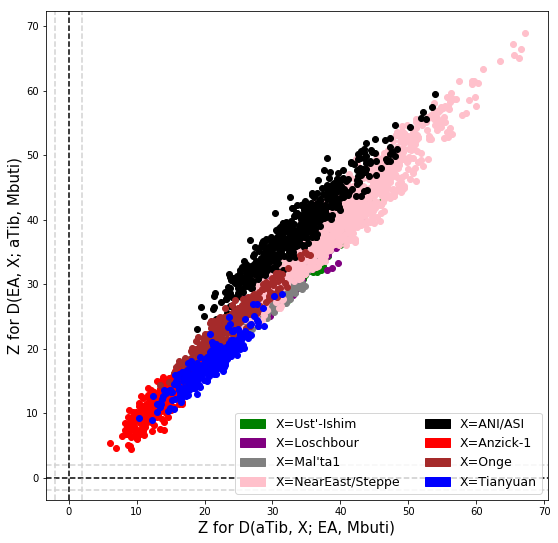

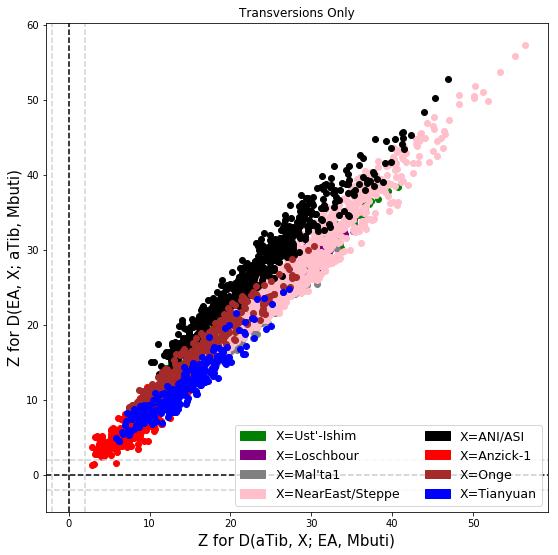

In [2]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
#import matplotlib
import matplotlib.patches as mpatches

agq=["Zongri-a","ZongriM32","Zongri-c","ZongriM78","Zongri-b","ZongriM40","Hedong4",#"XiahaishiM22",
     "Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11","Hupo-a","Hupo14",
     "Shangluzhuang0","Hupo8","Qunke1","Lajigai-a","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2","Wuba","HuoshaogouM117","Lierbao0"]
anx=["PukagongmaM1","PukagongmaM3","PukagongmaM5","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"]
weaklinks=["XiahaishiM22","Lajigai2","PukagongmaM2"]
eas=["Han","Dai","Ami","Daur"]
#eas=["Naxi","Yi","Tu","Tibetan","Sherpa"]
eas=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX","Tibetan_NyingchiX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
mylabel="EA" #"wEA""wEA-X"#
aeur=["Loschbour"]
ane=["Malta1"]
namer=["Clovis"]
casia=["Anatolia_N","Iran_N","Andronovo.SG","Afanasievo.SG"]
sasia=["Punjabi","Mala"]
ancother=["Onge"]
anceas=["Tianyuan"] #,"Papuan","Onge","Oase1","Stuttgart",
ust=["UstIshim"]
varypops=[anceas, ancother,namer,sasia,casia,ane,aeur,ust][::-1]
labels=["Tianyuan","Onge","Anzick-1",'ANI/ASI',"NearEast/Steppe","Mal'ta1","Loschbour","Ust'-Ishim"][::-1] #/Papuan/Onge/Oase1
dxcluster=agq+anx#+weaklinks
out="Mbuti"
colors=["blue","brown","red","black","pink","gray","purple",'green'][::-1]
markers=["o","v","s","+","D",">"]
myset1,myset2=(dxcluster,eas)
pDin="/mnt/solexa/mel_yang/aPlateau/update051518/"
pDout="/mnt/solexa/mel_yang/aPlateau/update051518/"
fh,tv=("complete2.dstat.log","")

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
handles1,handles2=[],[]
for ind,varypop in enumerate(varypops):
    print varypop
    handles2.append(mpatches.Patch(color=colors[ind], label="X="+labels[ind]))
    for myind in varypop:
        mypops1=[myset1,myind,myset2,out]
        Zaryu = pm.mkDary(pDin,fh,mypops1,(1,3),(0,2),"Z") 
        mypops2=[myset2,myind,myset1,out]
        Zaryl = np.transpose(pm.mkDary(pDin,fh,mypops2,(1,3),(0,2),"Z"))
        #print Zaryu,Zaryl
        ax1.plot(Zaryu,Zaryl,markers[0],color=colors[ind])
        

#ax1.set_ylim((-4,10))
#ax1.set_xlim((-4,10))
ax1.set_xlabel("Z for D(aTib, X; %s, %s)" % (mylabel,out),fontsize=15)
ax1.set_ylabel("Z for D(%s, X; aTib, %s)" % (mylabel,out),fontsize=15)
ax1.axvline(x=0, ls='dashed', c='black')
ax1.axhline(y=0, ls='dashed', c='black')
ax1.axvline(x=2, ls='dashed', c='lightgray')
ax1.axhline(y=2, ls='dashed', c='lightgray')
ax1.axvline(x=-2, ls='dashed', c='lightgray')
ax1.axhline(y=-2, ls='dashed', c='lightgray')
ax1.legend(loc='lower right')
ax1.legend(handles=handles2,loc=4,ncol=2,fontsize=12.5)
#ax1.legend(handles=handles1,loc=3)

fh,tv=("complete2.tv.dstat.log",".tv")

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
handles1,handles2=[],[]
for ind,varypop in enumerate(varypops):
    print varypop
    handles2.append(mpatches.Patch(color=colors[ind], label="X="+labels[ind]))
    for myind in varypop:
        mypops1=[myset1,myind,myset2,out]
        Zaryu = pm.mkDary(pDin,fh,mypops1,(1,3),(0,2),"Z") 
        mypops2=[myset2,myind,myset1,out]
        Zaryl = np.transpose(pm.mkDary(pDin,fh,mypops2,(1,3),(0,2),"Z"))
        #print Zaryu,Zaryl
        ax1.plot(Zaryu,Zaryl,markers[0],color=colors[ind])
        

#ax1.set_ylim((-4,10))
#ax1.set_xlim((-4,10))
ax1.set_xlabel("Z for D(aTib, X; %s, %s)" % (mylabel,out),fontsize=15)
ax1.set_ylabel("Z for D(%s, X; aTib, %s)" % (mylabel,out),fontsize=15)
ax1.set_title("Transversions Only")
ax1.axvline(x=0, ls='dashed', c='black')
ax1.axhline(y=0, ls='dashed', c='black')
ax1.axvline(x=2, ls='dashed', c='lightgray')
ax1.axhline(y=2, ls='dashed', c='lightgray')
ax1.axvline(x=-2, ls='dashed', c='lightgray')
ax1.axhline(y=-2, ls='dashed', c='lightgray')
ax1.legend(loc='lower right')
ax1.legend(handles=handles2,loc=4,ncol=2,fontsize=12.5)
#ax1.legend(handles=handles1,loc=3)

plt.show()

In [ ]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
#import matplotlib
import matplotlib.patches as mpatches

agq=["Zongri-a","ZongriM32","Zongri-c","ZongriM78","Zongri-b","ZongriM40","Hedong4",#"XiahaishiM22",
     "Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11","Hupo-a","Hupo14",
     "Shangluzhuang0","Hupo8","Qunke1","Lajigai-a","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2","Wuba","HuoshaogouM117","Lierbao0"]
anx=["PukagongmaM1","PukagongmaM3","PukagongmaM5","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"]
weaklinks=["XiahaishiM22","Lajigai2","PukagongmaM2"]
#eas=["Han","Dai","Ami","Daur","Sherpa","Tibetan","Naxi","Yi"]
aeur=["Loschbour"]
ane=["Malta1"]
namer=["Clovis"]
casia=["Anatolia_N","Iran_N","Andronovo.SG","Afanasievo.SG"]
sasia=["Punjabi","Mala"]
ancother=["Onge"]
anceas=["Tianyuan"] #,"Papuan","Onge","Oase1","Stuttgart",
varypops=[anceas, ancother,namer,sasia,casia,ane,aeur][::-1]
labels=["Tianyuan","Onge","Anzick-1",'ANI/ASI',"NearEast/Steppe","Mal'ta1","Loschbour"][::-1] #/Papuan/Onge/Oase1
dxcluster=agq+anx#+weaklinks
dxpairs=[(i,j) for indi,i in enumerate(dxcluster) for indj,j in enumerate(dxcluster) if indi>indj]
pairlabels=["%s_%s" % mypair for mypair in dxpairs]
#print pairlabels
out="Mbuti"
colors=["blue","brown","red","black","pink","gray","purple"][::-1]
markers=["o","v","s","+","D",">"]

pDin="/mnt/solexa/mel_yang/aPlateau/update051518/"
pDout="/mnt/solexa/mel_yang/aPlateau/update051518/"
fh,tv=("complete2.dstat.log","")
#fh,tv=("complete.tv.dstat.log",".tv")

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
handles1,handles2=[],[]
for ind,varypop in enumerate(varypops):
    print varypop
    handles2.append(mpatches.Patch(color=colors[ind], label="X="+labels[ind]))
    for myind in varypop:
        mypops1=[dxcluster,myind,dxcluster,out]
        Zary = pm.mkDary(pDin,fh,mypops1,(1,3),(0,2),"Z") 
        #print Zary
        Zaryu=np.triu(Zary)
        Zaryl=np.transpose(np.tril(Zary))
        Zaryu[Zaryu==0]=np.nan
        Zaryl[Zaryl==0]=np.nan
        #print Zaryu,Zaryl
        ax1.plot(Zaryu,Zaryl,markers[0],color=colors[ind])
        

#ax1.set_ylim((-4,10))
#ax1.set_xlim((-4,10))
ax1.set_xlabel("Z for D(aTib, X; aTib, %s)" % out,fontsize=15)
ax1.set_ylabel("Z for D(aTib, X; aTib, %s)" % out,fontsize=15)
ax1.axvline(x=0, ls='dashed', c='black')
ax1.axhline(y=0, ls='dashed', c='black')
ax1.axvline(x=2, ls='dashed', c='lightgray')
ax1.axhline(y=2, ls='dashed', c='lightgray')
ax1.axvline(x=-2, ls='dashed', c='lightgray')
ax1.axhline(y=-2, ls='dashed', c='lightgray')
ax1.legend(loc='lower right')
ax1.legend(handles=handles2,loc=4,ncol=2,fontsize=12.5)
#ax1.legend(handles=handles1,loc=3)

fh,tv=("complete.tv.dstat.log",".tv")

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
handles1,handles2=[],[]
for ind,varypop in enumerate(varypops):
    print varypop
    handles2.append(mpatches.Patch(color=colors[ind], label="X="+labels[ind]))
    for myind in varypop:
        mypops1=[dxcluster,myind,dxcluster,out]
        Zary = pm.mkDary(pDin,fh,mypops1,(1,3),(0,2),"Z") 
        #print Zary
        Zaryu=np.triu(Zary)
        Zaryl=np.transpose(np.tril(Zary))
        Zaryu[Zaryu==0]=np.nan
        Zaryl[Zaryl==0]=np.nan
        #print Zaryu,Zaryl
        ax1.plot(Zaryu,Zaryl,markers[0],color=colors[ind])
        

#ax1.set_ylim((-4,10))
#ax1.set_xlim((-4,10))
ax1.set_xlabel("Z for D(aTib, X; aTib, %s)" % out,fontsize=15)
ax1.set_ylabel("Z for D(aTib, X; aTib, %s)" % out,fontsize=15)
ax1.set_title("Transversions Only")
ax1.axvline(x=0, ls='dashed', c='black')
ax1.axhline(y=0, ls='dashed', c='black')
ax1.axvline(x=2, ls='dashed', c='lightgray')
ax1.axhline(y=2, ls='dashed', c='lightgray')
ax1.axvline(x=-2, ls='dashed', c='lightgray')
ax1.axhline(y=-2, ls='dashed', c='lightgray')
ax1.legend(loc='lower right')
ax1.legend(handles=handles2,loc=4,ncol=2,fontsize=12.5)
#ax1.legend(handles=handles1,loc=3)

plt.show()

In [44]:
import numpy as np
import plateaumodules as pm

datpd="/mnt/solexa/mel_yang/aPlateau/update051518/"
outpd="/mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/"
outpd="/mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/"
fh,tv,out=("complete2.dstat.log","","Mbuti")
#fh,tv=("complete.tv.dstat.log",".tv")

low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",#"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0",
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", #"Wenpuju03",
     "Lajigai-a","Lierbao0"] #"Qunke1","Hupo8","Lajigai2","Hedong4",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM2","PukagongmaM3",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1",
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
eas=["Daur","Han","Dai","Ami","Naxi","Yi","Tu","Sherpa",
     "Tibetan","Tibetan_ChamdoX","Tibetan_ShannanX","Tibetan_ShigatseX"]

#agq=["Zongri1a","Zongri23","Shangluzhuang","Heodong"]
popA=low+high
popB=low+high
thirdpops=low+high
for myind in thirdpops:
    #myind="Shangluzhuang"
    #myind="Hejiatai"
    
    mypops1=[popA,myind,popB,out]
    mypops2=[popB,myind,popA,out]
    DorZ="Z"

    newfh1=fh.split(".")[0]+tv+DorZ+"."+"aTib_%s_aTib_%s" % (myind,out)al
    #newfh2=fh.split(".")[0]+tv+DorZ+"."+"aTib_aTib_%s_%s" % (myind,out)
    Zary = pm.mkDary(datpd,fh,mypops1,(1,3),(0,2),DorZ)    
    print pm.Zmat2xlsx(Zary,outpd+newfh1,popA,popB,0,2)

    #Zary = pm.mkDary(datpd,fh,mypops2,(1,3),(2,0),DorZ)   
    #print pm.Zmat2xlsx(Zary,outpd+newfh2,popA,popB,2,0)

Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_Zongri-a_aTib_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_Zongri-b_aTib_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_Zongri-c_aTib_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_ZongriM32_aTib_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_ZongriM40_aTib_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_Daxiang0_aTib_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_Hedong6_aTib_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_Hejiatai_aTib_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_LiuwanQH-1_aTib_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_XiahaishiM9_aTib_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_Hupo-a_aTib_Mbuti!
Made /

In [1]:
import numpy as np
import plateaumodules as pm

datpd="/mnt/solexa/mel_yang/aPlateau/update051518/"
outpd="/mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/"
outpd="/mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/"
fh,tv,out=("complete2.dstat.log","","Mbuti")
#fh,tv=("complete.tv.dstat.log",".tv")

low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",#"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0",
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", #"Wenpuju03",
     "Lajigai-a","Lierbao0","Han","Sherpa_ShigatseX"] #"Qunke1","Hupo8","Lajigai2","Hedong4",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM2","PukagongmaM3",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1",
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
eas=["Daur","Han","Dai","Ami","Naxi","Yi","Tu","Sherpa",
     "Tibetan","Tibetan_ChamdoX","Tibetan_ShannanX","Tibetan_ShigatseX"]

#agq=["Zongri1a","Zongri23","Shangluzhuang","Heodong"]
popA=low+high
popB=low+high
thirdpops=low+high
thirdpops=["Han","Sherpa_ShigatseX"]
for myind in thirdpops:
    #myind="Shangluzhuang"
    #myind="Hejiatai"
    
    mypops1=[popA,myind,popB,out]
    mypops2=[popB,myind,popA,out]
    DorZ="Z"

    newfh1=fh.split(".")[0]+tv+DorZ+"."+"rev.aTib_%s_aTib_%s" % (myind,out)
    #newfh2=fh.split(".")[0]+tv+DorZ+"."+"aTib_aTib_%s_%s" % (myind,out)
    Zary = pm.mkDary(datpd,fh,mypops1,(1,3),(0,2),DorZ)    
    print pm.Zmat2xlsx(Zary,outpd+newfh1,popA,popB,0,2)

    #Zary = pm.mkDary(datpd,fh,mypops2,(1,3),(2,0),DorZ)   
    #print pm.Zmat2xlsx(Zary,outpd+newfh2,popA,popB,2,0)

Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.rev.aTib_Han_aTib_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.rev.aTib_Sherpa_ShigatseX_aTib_Mbuti!


In [8]:
import numpy as np
import plateaumodules as pm

datpd="/mnt/solexa/mel_yang/aPlateau/update051518/"
outpd="/mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/"
fh,tv,out=("complete2.dstat.log","","Mbuti")
#fh,tv=("complete.tv.dstat.log",".tv")

low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",#"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0",
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", #"Wenpuju03",
     "Lajigai-a","Lierbao0"] #"Qunke1","Hupo8","Lajigai2","Hedong4",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM2","PukagongmaM3",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1",
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
eas=["Daur","Han","Dai","Ami","Naxi","Yi","Tu","Sherpa",
     "Tibetan","Tibetan_ChamdoX","Tibetan_ShannanX","Tibetan_ShigatseX"]
eas=["Dai","Tu","Daur","Han","Naxi","Yi","Sherpa",
     "Tibetan","Tibetan_ChamdoX","Tibetan_ShannanX"]
others=["UstIshim","GoyetQ116-1","Vestonice16","Natufian","Malta1","Tianyuan",
       "French","Papuan","Onge","Mixe","Anzick-1"]
#agq=["Zongri1a","Zongri23","Shangluzhuang","Heodong"]
popA=low+high+eas
popB=low+high+eas
thirdpops=others
for myind in thirdpops:
    #mypops1=[popA,myind,popB,out]
    mypops2=[popA,popB,myind,out]
    DorZ="Z"

    #newfh1=fh.split(".")[0]+tv+DorZ+"."+"aTib_%s_aTib_%s" % (myind,out)
    newfh2=fh.split(".")[0]+tv+DorZ+"."+"aTibEA_aTibEA_%s_%s" % (myind,out)
    #Zary = pm.mkDary(datpd,fh,mypops1,(1,3),(0,2),DorZ)    
    #print pm.Zmat2xlsx(Zary,outpd+newfh1,popA,popB,0,2)

    Zary = pm.mkDary(datpd,fh,mypops2,(2,3),(0,1),DorZ)   
    print pm.Zmat2xlsx(Zary,outpd+newfh2,popA,popB,0,1)

Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.aTibEA_aTibEA_UstIshim_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.aTibEA_aTibEA_GoyetQ116-1_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.aTibEA_aTibEA_Vestonice16_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.aTibEA_aTibEA_Natufian_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.aTibEA_aTibEA_Malta1_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.aTibEA_aTibEA_Tianyuan_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.aTibEA_aTibEA_French_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.aTibEA_aTibEA_Papuan_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.aTibEA_aTibEA_Onge_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.aTibEA_aTibEA_Mixe_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/comp

In [2]:
import numpy as np
import plateaumodules as pm

datpd="/mnt/solexa/mel_yang/aPlateau/update051518/"
outpd="/mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/"
fh,tv,out=("complete2.dstat.log","","Mbuti")
#fh,tv=("complete.tv.dstat.log",".tv")

low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",#"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0",
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", #"Wenpuju03",
     "Lajigai-a","Lierbao0"] #"Qunke1","Hupo8","Lajigai2","Hedong4",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM2","PukagongmaM3",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1",
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
eas=["Dai","Tu","Daur","Han","Naxi","Yi","Sherpa",
     "Tibetan","Tibetan_ChamdoX","Tibetan_ShannanX"]

#agq=["Zongri1a","Zongri23","Shangluzhuang","Heodong"]
popA=eas
popB=eas
thirdpops=low+high
for myind in thirdpops:
    #myind="Shangluzhuang"
    #myind="Hejiatai"
    
    mypops1=[popA,myind,popB,out]
    mypops2=[popB,myind,popA,out]
    DorZ="Z"

    newfh1=fh.split(".")[0]+tv+DorZ+"."+"EA_%s_EA_%s" % (myind,out)
    #newfh2=fh.split(".")[0]+tv+DorZ+"."+"EA_%s_EA_%s" % (myind,out)
    Zary = pm.mkDary(datpd,fh,mypops1,(1,3),(0,2),DorZ)    
    print pm.Zmat2xlsx(Zary,outpd+newfh1,popA,popB,0,2)

    #Zary = pm.mkDary(datpd,fh,mypops2,(1,3),(2,0),DorZ)   
    #print pm.Zmat2xlsx(Zary,outpd+newfh2,popA,popB,2,0)

Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_Zongri-a_EA_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_Zongri-b_EA_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_Zongri-c_EA_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_ZongriM32_EA_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_ZongriM40_EA_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_Daxiang0_EA_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_Hedong6_EA_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_Hejiatai_EA_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_LiuwanQH-1_EA_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_XiahaishiM9_EA_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_Hupo-a_EA_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_

In [4]:
import numpy as np
import plateaumodules as pm

datpd="/mnt/solexa/mel_yang/aPlateau/update051518/"
outpd="/mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/"
fh,tv,out=("complete2.dstat.log","","Mbuti")
#fh,tv=("complete.tv.dstat.log",".tv")

low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",#"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0",
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", #"Wenpuju03",
     "Lajigai-a","Lierbao0"] #"Qunke1","Hupo8","Lajigai2","Hedong4",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM2","PukagongmaM3",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1",
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
eas=["Daur","Han","Dai","Ami","Naxi","Yi","Tu","Sherpa",
     "Tibetan","Tibetan_ChamdoX","Tibetan_ShannanX","Tibetan_ShigatseX"]
eas=["Dai","Tu","Daur","Han","Naxi","Yi","Sherpa",
     "Tibetan","Tibetan_ChamdoX","Tibetan_ShannanX"]

#agq=["Zongri1a","Zongri23","Shangluzhuang","Heodong"]
popA=eas
popB=eas
thirdpops=low+high
for myind in thirdpops:
    #mypops1=[popA,myind,popB,out]
    mypops2=[popA,popB,myind,out]
    DorZ="Z"

    #newfh1=fh.split(".")[0]+tv+DorZ+"."+"aTib_%s_aTib_%s" % (myind,out)
    newfh2=fh.split(".")[0]+tv+DorZ+"."+"EA_EA_%s_%s" % (myind,out)
    #Zary = pm.mkDary(datpd,fh,mypops1,(1,3),(0,2),DorZ)    
    #print pm.Zmat2xlsx(Zary,outpd+newfh1,popA,popB,0,2)

    Zary = pm.mkDary(datpd,fh,mypops2,(2,3),(0,1),DorZ)   
    print pm.Zmat2xlsx(Zary,outpd+newfh2,popA,popB,0,1)

Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_EA_Zongri-a_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_EA_Zongri-b_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_EA_Zongri-c_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_EA_ZongriM32_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_EA_ZongriM40_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_EA_Daxiang0_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_EA_Hedong6_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_EA_Hejiatai_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_EA_LiuwanQH-1_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_EA_XiahaishiM9_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/complete2Z.EA_EA_Hupo-a_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_

In [2]:
import matplotlib.pyplot as plt
print (plt.style.library)

{u'seaborn-darkgrid': RcParams({u'axes.axisbelow': True,
          u'axes.edgecolor': u'white',
          u'axes.facecolor': u'#EAEAF2',
          u'axes.grid': True,
          u'axes.labelcolor': u'.15',
          u'axes.linewidth': 0.0,
          u'figure.facecolor': u'white',
          u'font.family': [u'sans-serif'],
          u'font.sans-serif': [u'Arial',
                               u'Liberation Sans',
                               u'DejaVu Sans',
                               u'Bitstream Vera Sans',
                               u'sans-serif'],
          u'grid.color': u'white',
          u'grid.linestyle': u'-',
          u'image.cmap': u'Greys',
          u'legend.frameon': False,
          u'legend.numpoints': 1,
          u'legend.scatterpoints': 1,
          u'lines.solid_capstyle': u'round',
          u'text.color': u'.15',
          u'xtick.color': u'.15',
          u'xtick.direction': u'out',
          u'xtick.major.size': 0.0,
          u'xtick.minor.size': 0.0,
 